In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import math
from scipy.io import loadmat

In [2]:
data = loadmat("./ex5data1.mat")
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Xtest', 'ytest', 'Xval', 'yval'])

In [133]:
X  = data["X"]
Xtest = data["Xtest"]
Xval = data["Xval"]

y = data['y'][:, 0]
ytest = data['ytest'][:, 0]
yval = data['yval'][:, 0]

In [5]:
y.shape

(12,)

## Visuzlize the dataset

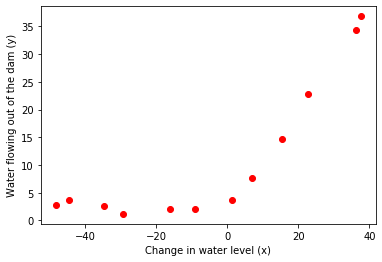

In [6]:
plt.plot(X, y, "ro")
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)');

## Regularized linear regression cost function


In [9]:
def linearRegCostFunction(X, y, theta, lamda):
    m = y.size
    h = X.dot(theta)
    J = (1/(2*m)) * np.sum((h-y)**2) + (lamda/(2*m))*np.sum(theta[1:]**2)
    
    grad = (1/m)*((h-y).T).dot(X)
    grad[1:] = grad[1:] + (lamda/m)*theta[1:]
    
    return J, grad

In [10]:
#Test case
m = y.size
theta = np.array([1, 1])
J, grad = linearRegCostFunction(np.concatenate([np.ones((m, 1)), X], axis=1), y, theta, 1)
#J = 303.993, grad= [-15.30, 598.25]
print(J)
print(grad)

303.9931922202643
[-15.30301567 598.25074417]


In [32]:
theta0  - np.array([1, 1])

array([-0.99342952, -0.99342952])

## Fitting linear regression

In [79]:
from scipy.optimize import minimize

In [80]:
def gradient_descent(X, y, theta0, lamda, learning_rate, maxiter= 4000):
    theta = theta0
    for _ in range(maxiter):
        J, grad = linearRegCostFunction(X, y, theta, lamda)
        theta -= learning_rate*grad
        #print(J)
    return theta

In [81]:
X_train= np.concatenate([np.ones((m, 1)), X], axis=1)
lamda = 0
theta0 = np.ones(X_train.shape[1])
theta = gradient_descent(X_train, y, theta0, 0, 0.001)

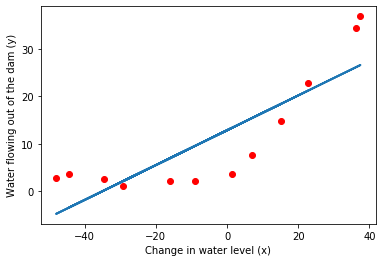

In [82]:
plt.plot(X, y, 'ro')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.plot(X, np.dot(X_train, theta), '-', lw=2);

## Learning Curve

In [83]:
def learningCurve(X, y, Xval, yval, lamda= 0):
    m = y.size
    train_error = []
    val_error = []
    theta0 = np.ones(X.shape[1])
    for i in range(1, m+1):
        theta = gradient_descent(X[:i], y[:i], theta0, lamda, 0.001)
        train_loss, _ = linearRegCostFunction(X[:i], y[:i], theta, lamda)
        val_loss, _ = linearRegCostFunction(Xval, yval, theta, lamda= 0)
        train_error.append(train_loss)
        val_error.append(val_loss)
    return train_error, val_error

In [84]:
X_train= np.concatenate([np.ones((m, 1)), X], axis=1)
X_val = np.concatenate([np.ones((yval.size, 1)), Xval], axis=1)
train_error, val_error = learningCurve(X_train, y, X_val, yval)

Text(0, 0.5, 'Error')

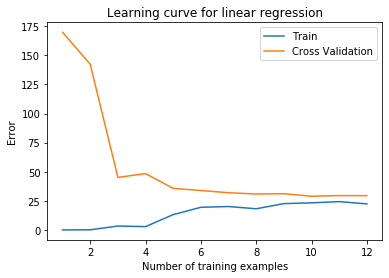

In [88]:
plt.plot(np.arange(1, m+1), train_error, np.arange(1, m+1), val_error)
plt.title('Learning curve for linear regression')
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('Number of training examples')
plt.ylabel('Error')

## Polynomial Features

In [89]:
def polyFeatures(X, p):
    X_poly = np.zeros((X.shape[0], p))
    for i in range(p):
        X_poly[:, i] = X[:, 0] ** (i + 1)
    return X_poly

In [91]:
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    X_norm = X - mu

    sigma = np.std(X_norm, axis=0, ddof=1)
    X_norm /= sigma
    return X_norm, mu, sigma

In [92]:
p = 8
X_poly = polyFeatures(X, p)
X_poly, mu, sigma = featureNormalize(X_poly)
X_poly = np.concatenate([np.ones((m, 1)), X_poly], axis=1)

X_poly_val = polyFeatures(Xval, p)
X_poly_val -= mu
X_poly_val /= sigma
X_poly_val = np.concatenate([np.ones((yval.size, 1)), X_poly_val], axis=1)


X_poly_test = polyFeatures(Xtest, p)
X_poly_test -= mu
X_poly_test /= sigma
X_poly_test = np.concatenate([np.ones((ytest.size, 1)), X_poly_test], axis=1)



In [115]:
X_poly[0, :]

array([ 1.        , -0.36214078, -0.75508669,  0.18222588, -0.70618991,
        0.30661792, -0.59087767,  0.3445158 , -0.50848117])

In [116]:
#X_train= np.concatenate([np.ones((m, 1)), X_poly], axis=1)
lamda = 0
theta0 = np.ones(X_poly.shape[1])
theta = gradient_descent(X_poly, y, theta0, 0, 0.001)

Text(0, 0.5, 'Water flowing out of the dam (y)')

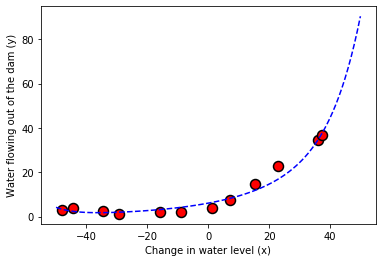

In [146]:
plt.plot(X, y, 'ro', ms=10, mew=1.5, mec='k')
num_pts = 100
x_pts = np.linspace(-50, 50, num_pts)

y_pts = theta[0] * np.ones(num_pts)
x_point = x_pts.reshape((num_pts, 1))
X_poly_pts = polyFeatures(x_point, p)
X_poly_pts -= mu
X_poly_pts /= sigma
X_poly_pts = np.concatenate([np.ones((num_pts, 1)), X_poly_pts], axis=1)


y_pts= np.dot(X_poly_pts, theta)
plt.plot(x_pts, y_pts, 'b--')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')

Text(0, 0.5, 'Error')

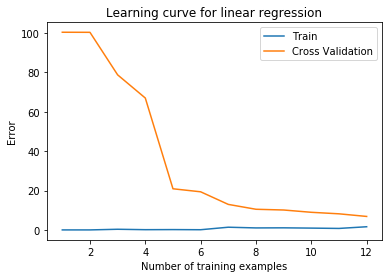

In [147]:
train_error, val_error = learningCurve(X_poly, y, X_poly_val, yval)
plt.plot(np.arange(1, m+1), train_error, np.arange(1, m+1), val_error)
plt.title('Learning curve for linear regression')
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('Number of training examples')
plt.ylabel('Error')